<a href="https://colab.research.google.com/github/ZeroRootJ/RollerCoaster/blob/main/Rollercoaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIN


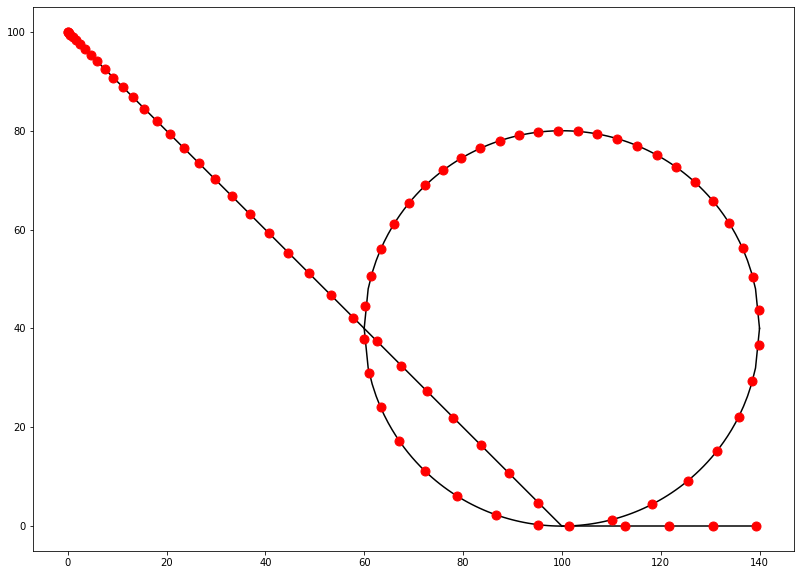

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from IPython import display

#
# DRAW TRACK
#
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.plot([0,100],[100,0],'k-') # draw line

# draw circle
x = np.linspace(60,140,100)
y_lower = 40-np.sqrt(-x**2+200*x-8400)
y_upper = 40+np.sqrt(-x**2+200*x-8400)
ax.plot(x,y_lower,'k-')
ax.plot(x,y_upper,'k-')

ax.plot([100,140],[0,0],'k-')


#
# SIMULATE
#

# LINE 1
vi = 0.01 # initial speed
x = 0
y = 100
t_space = 0.2 # time interval

ax.plot(x,y,'r',marker='o')

remainder = 0
while x<100:
    try:
        s = vi + math.pow(2*9.8*(100-y),0.5)*t_space # s: distance
    except ValueError as e:
        s = vi*t_space
    
    x += s/math.pow(2, 0.5)
    y += -s/math.pow(2, 0.5)
    
    if x>100:
        remainder = x-100
        x = 100
        y = 0
        break
    else:
        ax.plot(x,y,'r',marker='o',markersize=9)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.5)
        #plt.show()

# print(remainder)

# CIRCLE
theta = -90 # degrees
# WARNING CONVERT INTO RADIANS BEFORE SIN/COS CALC
c_len = 80*math.pi # circumference(2*pi*radius)
if remainder != 0:
    theta += remainder/c_len*360

x = 100 + 40 * math.cos(math.radians(theta))
y = 40 + 40 * math.sin(math.radians(theta))
ax.plot(x,y,'r',marker='o',markersize=9)
display.display(plt.gcf())
display.clear_output(wait=True)
time.sleep(0.5)
        

while theta<270:
    try:
        s = vi + math.pow(2*9.8*(100-y),0.5)*t_space # s: distance
    except ValueError as e:
        s = vi*t_space
    theta += s/c_len*360
    if theta >= 270:
        remainder = (theta-270)/360*c_len
    else:
        x = 100 + 40 * math.cos(math.radians(theta))
        y = 40 + 40 * math.sin(math.radians(theta))
        ax.plot(x,y,'r',marker='o',markersize=9)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.5)


# LINE 2
x = 100+remainder
y = 0
while x<140:
    s = math.pow(2*9.8*(100-y),0.5)*t_space # s: distance
    x += s
    if x>140:
        break
    else:
        ax.plot(x,y,'r',marker='o',markersize=9)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.5)

print("FIN")